In [431]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.10f' % x)


In [432]:
df = pd.read_csv('suicide_ds_2016.csv')

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [434]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.7100000000,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.1900000000,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.8300000000,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.5900000000,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.2800000000,Albania1987,NaN,"2,156,624,900",796,Boomers


In [435]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.9600000000,Uzbekistan2014,0.6750000000,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.5800000000,Uzbekistan2014,0.6750000000,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.1700000000,Uzbekistan2014,0.6750000000,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.6700000000,Uzbekistan2014,0.6750000000,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.4600000000,Uzbekistan2014,0.6750000000,"63,067,077,179",2309,Boomers


In [436]:
df.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

In [437]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

# Tidy data
- Drop columns:
    - remove HDI for year
    - remove country-year
- Rename columns:
    - 'suicides/100k pop'  => suicides_per_100k_pop
    - ' gdp_for_year ($) ' => gdp_for_year
    - 'gdp_per_capita ($)' => gdp_per_capita
- Remove data points:
    - remove data from 2016 due to incompleteness

In [438]:
# HDI has a lot of missing data -> drop the column
# country-year is not needed -> drop
# generation also controversial according to kaggle examples
tidy_df = df.drop(['HDI for year', 'country-year'], axis='columns')

# rename collumns to be snake case confirm and remove currency
tidy_df = tidy_df.rename(columns=
    {
        'suicides/100k pop': 'suicides_per_100k_pop',
        # the extra spaces in the name below are intended!
        ' gdp_for_year ($) ': 'gdp_for_year',
        'gdp_per_capita ($)':'gdp_per_capita'
    })
tidy_df.columns


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_per_100k_pop', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

In [439]:
# find missing rows
counts = tidy_df.groupby(['country', 'year']).count()
counts.where(counts < 12).dropna()
# for 16 countries there is data missing in 2016 
# => remove that year to prevent misinterpretation
tidy_df = tidy_df[tidy_df['year'] != 2016]

Text(0, 0.5, 'frequency')

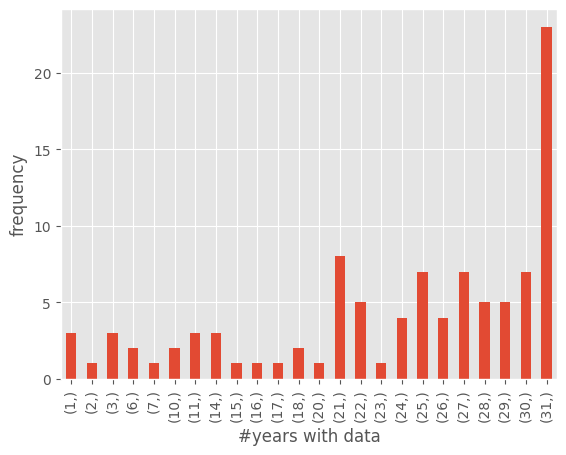

In [440]:
temp = tidy_df.groupby(['country', 'year']).count().reset_index()
temp = temp[['country','year']]
country_years = temp.groupby('country').count()
ax = country_years.value_counts(sort=False).plot.bar()
ax.set_xlabel('#years with data')
ax.set_ylabel('frequency')

plot above shows available data.  
31 is max (1985 to 2015)  
Whats a reasonable cutoff?  
10 years?

In [441]:
# get country names with less than k years of data available
temp = country_years.reset_index()
MIN_DATA_YEARS = 3
names = temp[temp.year <= MIN_DATA_YEARS].country.values
names

array(['Bosnia and Herzegovina', 'Cabo Verde', 'Dominica', 'Macau',
       'Oman', 'Saint Kitts and Nevis', 'San Marino'], dtype=object)

In [442]:
# remove countries determined above by using .isin with the prepended negation (~))
tidy_df = tidy_df[~tidy_df['country'].isin(names)]
tidy_df.shape

(27492, 10)

# Plot suidice per 100k rates for country, year etc
confused about per 100k colum: how to aggregate them to get per year value? mean? does not seem to fit visualizations on kaggle 
=> not possible. simply recalcualte by summing population and suicides_no in all categories and them take the mean over the years

In [ ]:
def add_per100k(df):
    df['per100k'] = ((df.suicides_no / df.population) * 100_000)
    return df

In [443]:
# by_country = df.groupby('country')['suicides/100k pop']
# by_country.mean().mean()

In [444]:
# country_year_gby = df.groupby(['country','year'])['suicides/100k pop']
# country_year_gby.describe()

In [445]:
# country_year_gby.mean()

In [446]:
# france[['year','suicides/100k pop']]
# france = df[df.country == 'France']
# france = france[france.year.between(1985,2015)]
# ger = df[df.country == 'Germany']
# # not really needed, only data from 1990 to 2015 available
# ger = ger[ger.year.between(1985,2015)]
# ger_year = ger.groupby('year')
# ger_year.sum(numeric_only=True)

country
Germany   14.4057216400
Name: per100k, dtype: float64


<AxesSubplot: ylabel='country'>

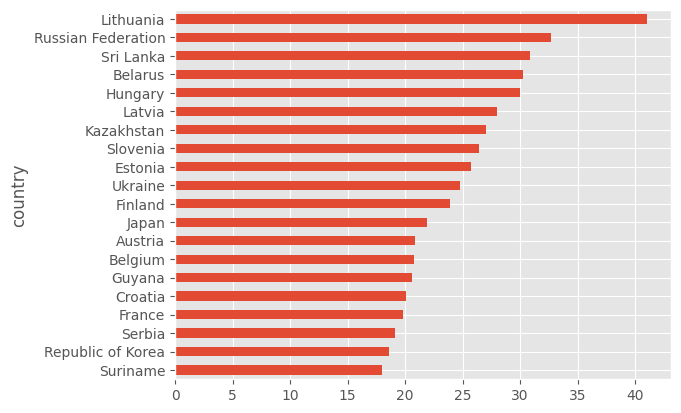

In [447]:
by_country_and_year = tidy_df.groupby(['country', 'year'])[
    ['population', 'suicides_no']].sum(numeric_only=True)
by_country_and_year['per100k'] = (
    by_country_and_year['suicides_no'] / by_country_and_year['population']) * 100_000
# by_country_and_year[['country','per100k']].mean('per100k')
country_alltime_avg = by_country_and_year.groupby('country').mean('per100k')
country_alltime_avg = country_alltime_avg.per100k
print(country_alltime_avg.filter(items=['Germany']))
country_alltime_avg = country_alltime_avg.sort_values()
country_alltime_avg[-20:].plot.barh()
# country_alltime_avg.plot.barh(x='per100k', y='country')
# country_alltime_avg.per100k.plot.barh()


In [453]:
ger_2015 = tidy_df[tidy_df.year == 2015][tidy_df.country == 'Germany'][['population','suicides_no']].sum(numeric_only=True)
ger_2015['per100k'] = ((ger_2015.suicides_no / ger_2015.population) * 100_000)
ger_2015

/var/folders/v4/5kdk6t_57x3gwhsz8x8jl_900000gn/T/ipykernel_47588/1117506055.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ger_2015 = tidy_df[tidy_df.year == 2015][tidy_df.country == 'Germany'][['population','suicides_no']].sum(numeric_only=True)


population    78136683.0000000000
suicides_no      10088.0000000000
per100k             12.9107093015
dtype: float64

In [457]:
avg_1995 = tidy_df[tidy_df.year == 1995].groupby('country')[['population','suicides_no']].sum(numeric_only=True)

avg_1995

,population,suicides_no
country,,
Albania,2903400,88
Antigua and Barbuda,66846,0
Argentina,31345400,2204
Armenia,3443200,130
Aruba,73581,8
...,...,...
Ukraine,48415300,14541
United Kingdom,54746964,4315
United States,243164200,31272


In [449]:
test = tidy_df[tidy_df.year == 2015].groupby('country')[
    ['country','population', 'suicides_no']].sum(numeric_only=True)
test['per100k'] = (
    test['suicides_no'] / test['population']) * 100_000
test.per100k.mean()

10.852000427856758

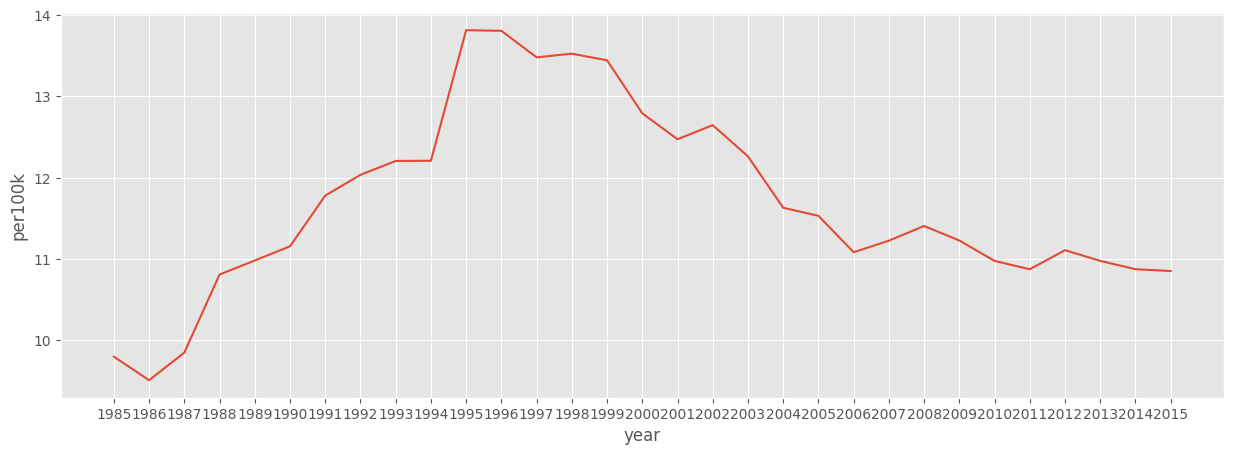

In [450]:
# plot avg per 100k rate across all coutnries per year in a line plot
test = tidy_df.groupby(['year', 'country'])[
    ['population', 'suicides_no']].sum(numeric_only=True)
test['per100k'] = (test['suicides_no'] / test['population']) * 100_000
# test.mean('per100k', axis='column')
test = test.reset_index().groupby('year').per100k.mean()


fig, ax = plt.subplots(figsize=(15,5)) #for size of figure

t = sns.lineplot(data=test,markers=True, ax=ax)
ticks = range(1985,2016)
t.set_xticks(ticks, labels=ticks)




In [451]:

# corr = by_country_and_year.reset_index().corr()
# sns.heatmap(corr, annot=True)